## Phase 3
Deanna Gould

gdm is like gbf but sklearn version


### Overview

### Importing Libraries

In [1]:
# Import libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Import libraries for processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (confusion_matrix, classification_report, ConfusionMatrixDisplay)

# Import libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
## HistGradientBoostingClassifier
from xgboost import XGBClassifier

### Data Analysis

In [2]:
# Creating DataFrame

df = pd.read_csv('Data/churndata.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.shape

(3333, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [7]:
df['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

In [8]:
df2 = df.copy()

In [9]:
df2.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [10]:
df2.drop(columns = ['area code', 'phone number'], axis=1, inplace=True)

In [11]:
df2.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
df2['international plan'], df2['voice mail plan'] = (df2['international plan'].map(dict(yes=1, no=0)), 
                                                     df2['voice mail plan'].map(dict(yes=1, no=0)))

In [13]:
df2.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [14]:
df2['churn'] = df2['churn'].astype('int64')

In [15]:
df2.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [16]:
df2['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [17]:
print(df['international plan'].value_counts())
print(df['voice mail plan'].value_counts())
print(df2['international plan'].value_counts())
print(df2['voice mail plan'].value_counts())

no     3010
yes     323
Name: international plan, dtype: int64
no     2411
yes     922
Name: voice mail plan, dtype: int64
0    3010
1     323
Name: international plan, dtype: int64
0    2411
1     922
Name: voice mail plan, dtype: int64


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   int64  
 3   voice mail plan         3333 non-null   int64  
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

In [19]:
## use seaborn to make bar charts for correlations, etc

In [ ]:
df2

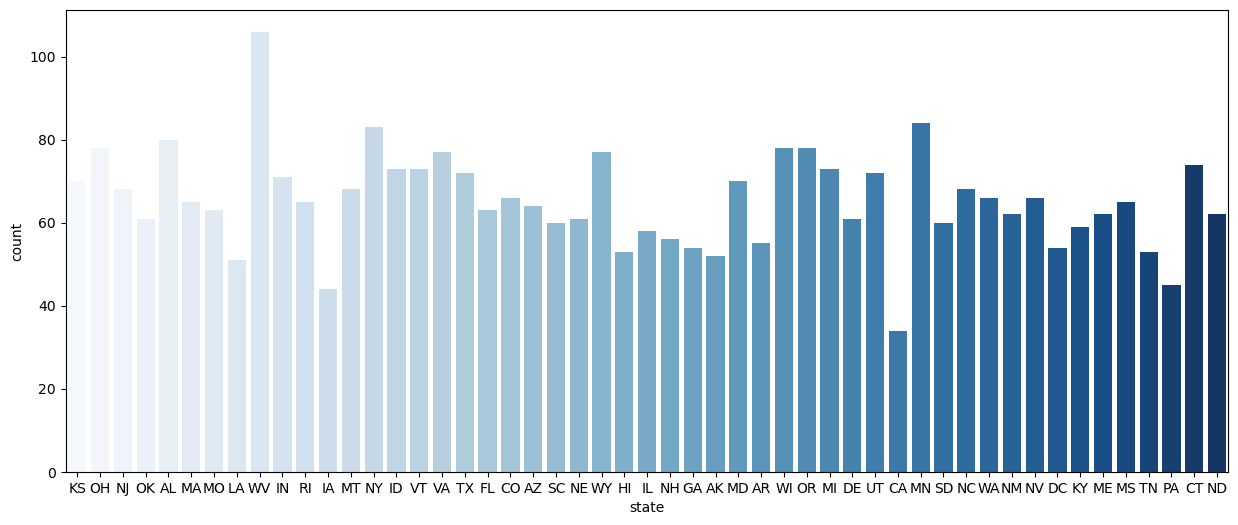

In [37]:
fig, axes = plt.subplots(figsize = (15, 6))
sns.countplot(x = 'state', data=df2, palette='Blues');

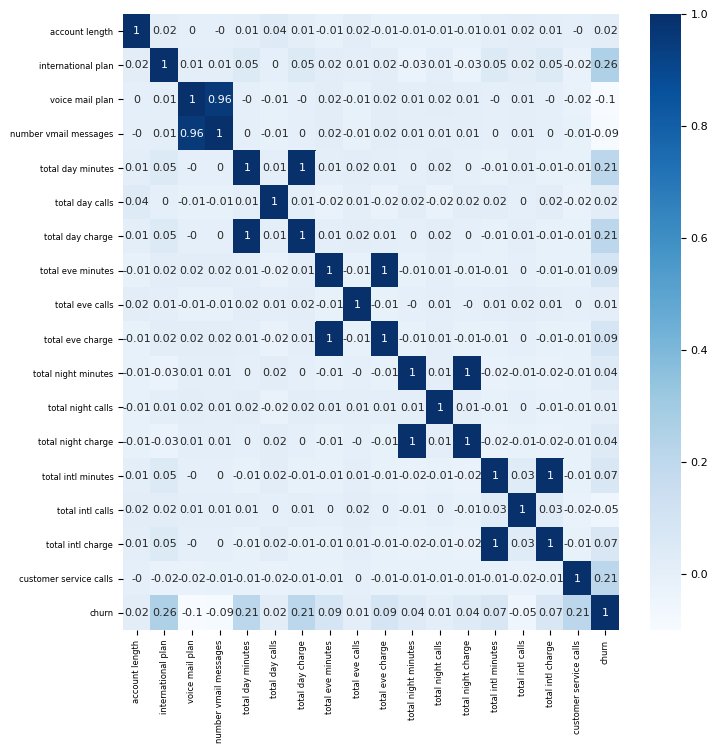

In [42]:
# Creating a heatmap
fig, axes = plt.subplots(figsize = (8, 8))
plt.rcParams.update({'font.size':8})
sns.heatmap(data=df2.corr().round(2), cmap='Blues', annot=True);

In [ ]:
# based on heatmap, charge is based on minutes

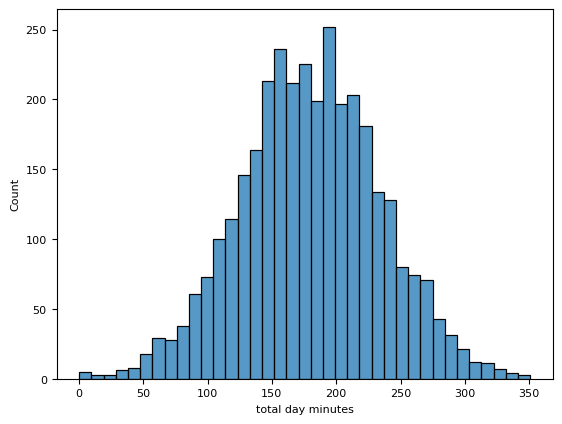

In [46]:
#sns.hist

ax = sns.histplot(x='total day minutes', data=df2, palette='Blues')

<AxesSubplot:xlabel='churn', ylabel='count'>

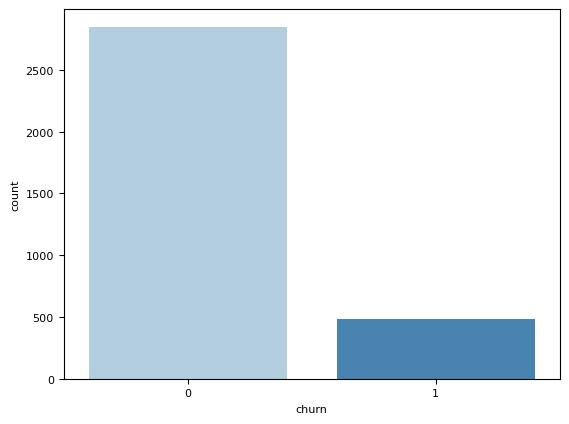

In [48]:
# matplotlib data labels code

sns.countplot(x='churn', data = df2, palette='Blues')

In [ ]:
# find high mid and low churn rates and calculate churn rates
# plot by state
# use if statements to plot them >= <= 

### Preprocessing

In [ ]:
# train test split
# one hot encoding


In [49]:
X = df2.drop('churn', axis = 1)
y = df2['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [50]:
X_train.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
2654,ME,66,0,0,0,207.7,85,35.31,196.7,112,16.72,261.7,83,11.78,6.8,3,1.84,1
3162,UT,81,0,0,0,129.9,121,22.08,230.1,105,19.56,140.5,123,6.32,13.3,3,3.59,0
2333,NM,16,0,0,0,144.8,84,24.62,164.9,141,14.02,231.5,75,10.42,8.2,4,2.21,2
553,UT,61,1,0,0,78.2,103,13.29,195.9,149,16.65,108.0,100,4.86,10.1,6,2.73,2
1921,DE,136,0,0,0,101.7,105,17.29,202.8,99,17.24,136.2,119,6.13,9.4,6,2.54,3


In [70]:
# Splitting into num and cat

X_train_n = X_train.drop('state', axis = 1)
X_train_c = X_train[['state']]

In [71]:
X_train_n.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
2654,66,0,0,0,207.7,85,35.31,196.7,112,16.72,261.7,83,11.78,6.8,3,1.84,1
3162,81,0,0,0,129.9,121,22.08,230.1,105,19.56,140.5,123,6.32,13.3,3,3.59,0
2333,16,0,0,0,144.8,84,24.62,164.9,141,14.02,231.5,75,10.42,8.2,4,2.21,2
553,61,1,0,0,78.2,103,13.29,195.9,149,16.65,108.0,100,4.86,10.1,6,2.73,2
1921,136,0,0,0,101.7,105,17.29,202.8,99,17.24,136.2,119,6.13,9.4,6,2.54,3


In [72]:
X_train_c.head()

,state
2654,ME
3162,UT
2333,NM
553,UT
1921,DE


In [86]:
ohetest2 = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [87]:
X_train_ccc = X_train.copy()

In [88]:
X_train_cccohe = ohetest2.fit_transform(X_train_ccc)

In [91]:
# How to recover column names from another df
#X_train_cccohedf = pd.DataFrame(X_train_cccohe, columns = ohetest2.get_feature_names())

In [92]:
X_train_cccohedf.head()

,x0_AK,x0_AL,x0_AR,x0_AZ,x0_CA,x0_CO,x0_CT,x0_DC,x0_DE,x0_FL,...,x17_0,x17_1,x17_2,x17_3,x17_4,x17_5,x17_6,x17_7,x17_8,x17_9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
n_pipe = Pipeline(steps = [('scaler', StandardScaler())])
c_pipe = Pipeline(steps = [('ohe', OneHotEncoder(sparse = False, handle_unknown = 'ignore'))])
cf = ColumnTransformer(transformers = [('state_pipe', c_pipe, X_train_c.columns), ('num', n_pipe, X_train_n.columns)])

In [ ]:
## check cumulative lab for pipelines

### Modeling

In [ ]:
# create another pipeline for modeling first part is transformer, second part is for modeling

### Conclusion